In [1]:
import pandas as pd
import os

In [2]:
csv_list = []
appended = pd.DataFrame()
#LUIGI_LOG_PATH='/usr/local/trustyou/home/andream/nfs/processmining/experiments'
LUIGI_LOG_PATH = '/usr/local/trustyou/home/andream/nfs/processmining/minilogs/daily/'
#LUIGI_LOG_PATH='/usr/local/trustyou/home/andream/git_tree/processmining/tests/data/'
#LUIGI_LOG_PATH = '/usr/local/trustyou/home/andream/nfs/processmining/minilogs/table-precomp/logs/tch/'
for filename in os.listdir(LUIGI_LOG_PATH):
    #if filename.endswith('.csv') and filename.startswith('catts_2traces_7act_varDevBothTimes_varDurDev_running-example.csv'):
    #if filename.endswith('.csv') and filename.startswith('catts_1trace_7act_v'):
    #if filename.endswith('.csv') and filename.startswith('catts_1trace_7act_0dur_running-example.csv'):
    #if filename.endswith('.csv') and filename.startswith('catts_1trace_7act_1dayDur_meets_running-example.csv'):
    #if filename.endswith('.csv') and filename.startswith('catts_1trace_7act_meetsStarts'):
    if filename.endswith('.csv') and filename.startswith('p'):
        log_path = LUIGI_LOG_PATH+'/'+filename
        csv_list.append(filename)
        print('Preprocessing... ',log_path)
        df = pd.read_csv(log_path, index_col=False)
        appended = appended.append(df)

#appended_df
csv_list.sort()
print(csv_list)

filename = os.path.splitext(csv_list[0])[0]

#appended_df.to_datetime(start_time, format="%Y-%m-%d:%H:%M:%S").sort_values()
appended['start_time'] = pd.to_datetime(appended['start_time'], format="%Y-%m-%d %H:%M:%S").sort_values()
appended['end_time'] = pd.to_datetime(appended['end_time'], format="%Y-%m-%d %H:%M:%S").sort_values()
appended = appended.sort_values(by=['start_time'], ascending=True)
appended['case'] = appended.apply(lambda row: str(row['case']), axis=1)
print(len(appended))
appended.head()

Preprocessing...  /usr/local/trustyou/home/andream/nfs/processmining/minilogs/daily//param_catts_daily.2019-09-.csv
['param_catts_daily.2019-09-.csv']
15711


,case,activity,start_time,end_time
14463,daily.2019-09-01_09-29-01.csv,AllTasks,2019-09-01 09:29:23,2019-09-03 03:43:13
14468,daily.2019-09-01_09-29-01.csv,CrawlFeedTask,2019-09-01 09:42:15,2019-09-01 10:01:16
14467,daily.2019-09-01_09-29-01.csv,ProxySetupTask,2019-09-01 09:42:15,2019-09-01 09:54:13
14464,daily.2019-09-01_09-29-01.csv,DumpTask(target_filename=None)(chunk=prep)(sql...,2019-09-01 09:42:15,2019-09-01 09:43:44
14465,daily.2019-09-01_09-29-01.csv,DumpTask(target_filename=None)(chunk=prep)(sql...,2019-09-01 09:42:15,2019-09-01 10:09:02


In [3]:
import sys
sys.path.append('..')


In [4]:
from processmining.plot import point_transformer as pt

#point_transformer import run_point_transformer

In [5]:
average_trace_activities = pt.get_data_selection_avgtrace(pt.get_relative_timestamps(appended)).sort_values(by=['num_start'])['activity'].tolist()

In [6]:
pd.set_option('display.max_colwidth', -1)

index_used=[[0,-1]]
#index_used=[[0,31],[21,51],[41,71],[61,91],[81,111],[87,117],
#            [101,119],[117,120],[118,122],[120,126],[123,156],
#            [139,170],[141,171],[170,178],[175,216],[206,246],[216,256]]

for indexes in index_used:
    #subset = appended[appended['activity'].str.startswith('ExtractTask') & appended['case']]
    subset = appended[appended['activity'].isin(average_trace_activities[indexes[0]:indexes[1]])]
    #subset = appended[appended['activity'].isin(average_trace_activities[indexes[0]:indexes[1]]) & ~appended['activity'].str.startswith('ExtractTask(crawler=creepy-crawly)(chunk')]

    output_prefix = LUIGI_LOG_PATH+'graphs/avgActSlideSplit/'+filename+'All_'+str(indexes[0])+'_'+str(indexes[1])+'act_'+str(len(subset))+'pts'
    #print(output_prefix)

    print(len(subset),' length of subset')
    
    #print(average_trace_activities[indexes[0]:indexes[1]])
    #subset.head()
    #subset= appended.copy()
    #subset = appended[appended['case']=='daily.2019-09-01_09-29-01.csv']
    #snippet = plot_point_transformer_selection(subset, output_prefix)
    #snippet.head()

15699  length of subset


In [7]:
subset = appended.copy()
#subset = appended[appended['activity'].str.startswith('CrawlTask')].head(1000)
#print(subset['activity'][0])
print(len(subset),' length of subset')
output_prefix = LUIGI_LOG_PATH+'graphs/'+filename
print(output_prefix)
#snippet = plot_point_transformer_selection(subset, output_prefix)
subset = pt.get_relative_timestamps(subset)
skyline_points = pt.get_skyline_points(subset)
skyline_points.head()

15711  length of subset
/usr/local/trustyou/home/andream/nfs/processmining/minilogs/daily/graphs/param_catts_daily.2019-09-


,num_start,num_end,activity,case
0,0.0,152030.0,AllTasks,daily.2019-09-01_09-29-01.csv
1,151970.0,152030.0,DumpTask(target_filename=review_2017_1)(chunk=prep)(sql_filename=review),daily.2019-09-18_14-08-01.csv
2,157011.0,157069.0,ConvertDumpTask(target_filename=review_2015_4)(chunk=prep)(sql_filename=review),daily.2019-09-01_09-29-01.csv
3,162527.0,162585.0,CrawlTask(crawler=creepy-crawly)(chunk=01),daily.2019-09-16_19-44-01.csv
4,190671.0,190732.0,CrawlTask(crawler=creepy-crawly)(chunk=01),daily.2019-09-04_23-23-01.csv


In [8]:
#print(len(skyline_points), 'points are part of skylines')
unique_sk_activities = skyline_points['activity'].unique().tolist()
#print(len(unique_sk_activities), 'activities in the skyline')
skyline_points.groupby('case').size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

activities=[]
for i, case in enumerate(skyline_points['case'].unique()):
    acts = skyline_points[skyline_points['case']==case]['activity'].unique().tolist()
    activities.append(acts)
    #print(case, len(acts))

representative = skyline_points[['case','activity']].drop_duplicates()
rep_appereances = representative.groupby(by = ['activity']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)
#rep_appereances = skyline_points.groupby(by = ['activity']).size().reset_index(name='counts').sort_values(by=['counts'], ascending=False)

pd.set_option('display.max_rows', None)
print('\n',len(rep_appereances), 'Activities appear in the skyline:')
rep_appereances.head()
#rep_appereances[rep_appereances['counts']<13]

#rep_appereances.groupby(by = ['counts']).size().reset_index(name='activities').sort_values(by=['counts'], ascending=False)


 139 Activities appear in the skyline:


,activity,counts
69,QCCountTask(chunk=01),13
17,CrawlChunkTask(crawler=creepy-crawly)(chunk=01),13
78,QCValidateExtractTask(chunk=01),13
81,QCValidateExtractXmlifyTask(chunk=01),13
65,PrepTask,13


/usr/local/trustyou/home/andream/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Number of activities')

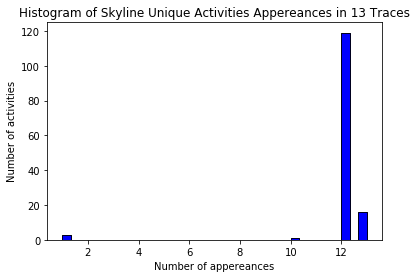

In [9]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(rep_appereances['counts'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(rep_appereances['counts'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Skyline Unique Activities Appereances in 13 Traces')
plt.xlabel('Number of appereances')
plt.ylabel('Number of activities')

ValueError: color kwarg must have one color per dataset

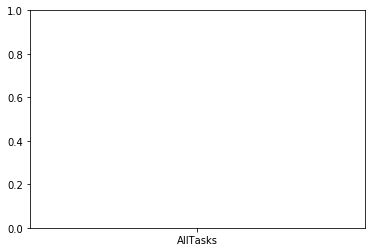

In [20]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(skyline_points['activity'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
sns.distplot(skyline_points['activity'], hist=True, kde=False, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Skyline Unique Activities Appereances in 13 Traces')
plt.xlabel('Number of appereances')
plt.ylabel('Number of activities')